In [1]:
import pandas as pd
import numpy as np
from keras import regularizers

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
a=df.isnull()

In [4]:
df.where(a==False)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
df.shape

(1030, 9)

In [6]:
data=df.astype('float64')

In [7]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [8]:
mean=data.mean(axis=0)
data= data-mean
std=data.std(axis=0)
data=data/std
display(data)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


In [9]:
train_data=data[0:825] 
train_targets=train_data.iloc[0:825,[8]] 
train_data=train_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [10]:
test_data=data[826:1030]
test_targets=test_data.iloc[0:204,[8]]
test_data=test_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [11]:
from keras import models,layers
from keras import regularizers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
   
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [12]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

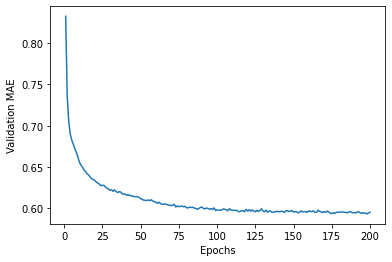

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
model = build_model()
model.fit(train_data, train_targets,
epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

7/7 [==============================] - 0s 2ms/step - loss: 0.6332 - mae: 0.6515


In [16]:
c=np.array(test_data.iloc[20])
a=c.reshape(1,8)
display(a)
display(test_data.iloc[25])

array([[ 0.81174134,  1.31090679, -0.8467326 ,  0.44172623,  0.13313708,
        -1.91525864, -0.20680116, -0.27959729]])

Cement (component 1)(kg in a m^3 mixture)               -1.159430
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1.322497
Fly Ash (component 3)(kg in a m^3 mixture)               1.434624
Water  (component 4)(kg in a m^3 mixture)                1.003676
Superplasticizer (component 5)(kg in a m^3 mixture)      0.802723
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -1.850953
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.793012
Age (day)                                               -0.279597
Name: 851, dtype: float64

In [17]:
test_targets.iloc[20]

Concrete compressive strength(MPa, megapascals)     1.801299
Name: 846, dtype: float64

In [18]:
model.predict(a)

array([[0.77876866]], dtype=float32)